In [1]:
import seaborn as sns
import  matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

matplotlib is the original visualisation package in python . seaborn builds on top of that and uses custom class written internally to abstract away a lot of what you will need to manually code in matplotlib. We will use components from both packages to build our visualisations .

first we will look at how we can control different parts of the visual frame with matplotlib and seaborn functions and attribute and we will get to data specific visualisation . Using the control of visual frame in context of those plots has been something your can practice .

Also know that there are tons of possibilities , we will focus on covering visualising data of different kind and their combinations in our context . If you want to explore any specific kind of visual that you might have seen somewhere; it might require a ton of customisation, we can explore that offline over email aside from the in-class discussion. 

# Color Palettes

seaborn has multiple color palettes that you can use . lets start with looking at default color palette 

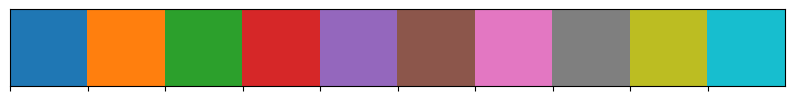

In [2]:
sns.palplot(sns.color_palette())

you can find documentation on all available palettes in seaborn here [dont get bogged down by so many available options there , you can do all of what we are going to do with default palette also ]

https://www.practicalpythonfordatascience.com/ap_seaborn_palette

lets quickly discuss how to create a custom palette apart from the ones available already in seaborn . You can use hexadecimal codes for colors. 

you can find reference for hexadecimal codes for colors here : https://htmlcolorcodes.com

In [3]:
palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
# once you have created your palette you can use sns.set_palette to make it default for the rest of your notebook
# also you can as many colors as you want 

In [4]:
sns.set_palette(palette)
# you can use this to set palette to other available palettes in seaborn 
# for example : sns.set_palette(sns.color_palette('pastel')) will set the palette to pastel palette as you might 
# have seen in the palette link shared earlier 

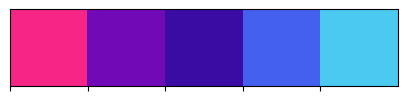

In [5]:
sns.palplot(sns.color_palette())
# these are the colors that we selected in our color palette with hexadecimal codes earlier 
# feel free to whatever colors you want to work with 

Here is a good discussion on how to choose colors : https://seaborn.pydata.org/tutorial/color_palettes.html#general-principles-for-using-color-in-plots

# Stlying and Customising a Visual with matplotlib.pyplot

In [6]:
# note that we have imported matplotlib.pyplot as plt and we will be using that alias

In [7]:
# lets read some data to visualise first
bd=pd.read_csv(r'./bd_train.csv')

we are going to create a simple countplot for different job categories present in our data. and with that we will explore in what all ways we can do some easy customisation. Lets start with default catplot.

In [8]:
bd.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment.Tax.Saving.Bond,Home.Loan,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance
0,4888,Zero,55-60,Widowed,Retired,Unknown,Own Home,"<10,000, >= 8,000",No,No,...,33.47,12.96,4.99,1,Female,North West,91.85,25.71,95.52,249.82
1,8525,Zero,61-65,Partner,Retired,Retired,Own Home,">=35,000",No,No,...,45.96,28.95,3.99,2,Male,North West,127.65,56.21,89.20,222.27
2,3411,3,31-35,Partner,Professional,Housewife,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,2,Female,North West,4.19,0.00,3.50,17.05
3,692,Zero,51-55,Partner,Secretarial/Admin,Other,Own Home,"<20,000, >=17,500",No,No,...,0.00,0.00,0.00,2,Male,North West,9.59,0.00,7.99,-72.74
4,10726,1,51-55,Partner,Retired,Retired,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,15.69,5.83,15.66,-13.98


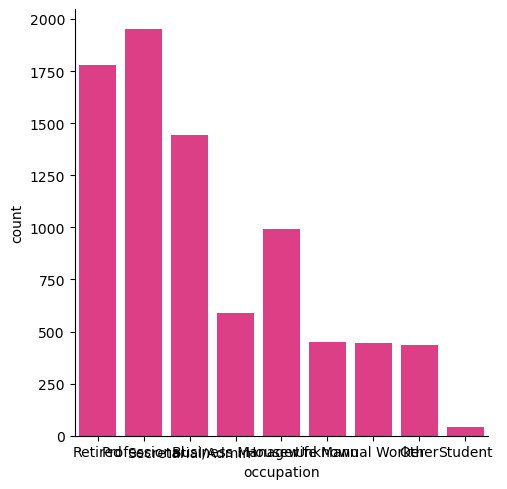

In [9]:
sns.catplot(x='occupation', data=bd,kind='count')

There is a lot we can do to make this look better. Lets do that and in process learn about customisation options available in seaborn 

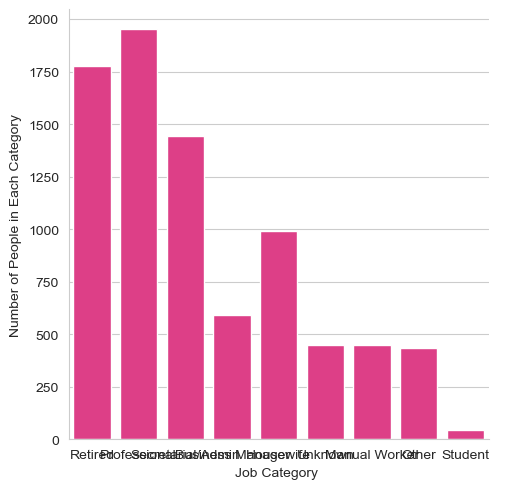

In [10]:
# There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`.
# They are each suited to different applications and personal preferences. 

sns.set_style('whitegrid')

sns.catplot(x='occupation', data=bd,kind='count')

# set axes labels
plt.xlabel("Job Category ")
plt.ylabel("Number of People in Each Category")

plt.show()

Note that we first create the plot with seaborn and then plt object from matplotlib to modify different aspects of the visualisation

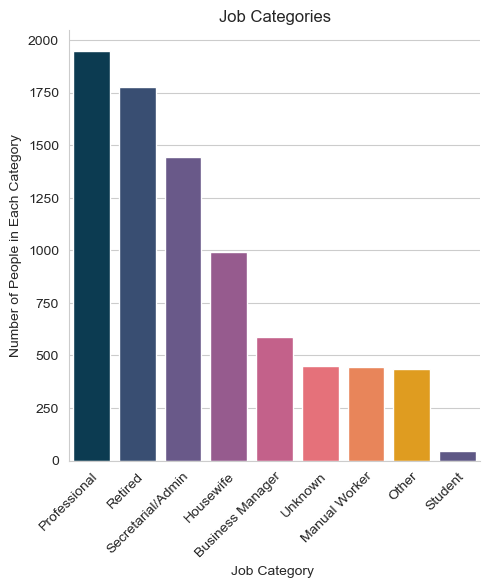

In [11]:
sns.set_style('whitegrid')

# Reorder the categories on x axes
# we are using here order driven by descending frequencies which we can calculate with value_counts 
# but you can pass custom order also


cat_order=list(bd['occupation'].value_counts().index)

# you can also pass your own color palette , different from the set palette or default palette

my_palette=["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600", "#58508d"]


sns.catplot(x='occupation', data=bd,kind='count',order=cat_order,palette=my_palette)

# set axes labels
plt.xlabel("Job Category ")
plt.ylabel("Number of People in Each Category")

# rotate xticks to make them readable 

plt.xticks(rotation=45,rotation_mode='anchor',ha='right')
# try removing each of those inputs and see what it does to your plot

# Put Title to the chart 

plt.title('Job Categories')

plt.show()


matplotlib is a powerful low level library and plt object here comes with a ton of other options to customise things . Keep in mind that not all option will make sense in context of all kind of visualisation . For example order categories will not fit with scenario of working with just numeric data.

Other notable customisation options available with plt here [its not an exhaustive list ] 

`plt.xlim,plt.ylim` : control ranges of x and y axes in case of numeric data <br />
`plt.legend` : add legend to chart <br />
`plt.annotate` : to add annotation to your chart <br />
`plt.figure` : to control different aspect of the figure like figure size , resolution etc <br />

there is a long list of such options. 

You can also explore more arguments available in the option shown earlier , for example setting font and font size in `xlabel` . 

Lets now get started with what kind of visualisation we will use in context of different kind of data. Lets go!

# Numeric Data

For a single numeric column , visualising individual values doesnt serve any purpose. Visualisation is supposed to be a visual summary of the data. Visual summary of a numeric column gives you an idea of frequency distribution of the values . If we go about looking at frequency of individual values , that might not be very informative either because numeric columns have too many unique values. A more informative way is to first make sequential bins of the values across range of numeric column and then see how many values lie in those bins visually . 

For example a numeric feature like age can broken to bins such as 0-5 , 5-10 , 10-15 and so on; seaborn does this internally for numeric features depending on the values that it see in data column. 

This visual representation of frequency in sequential bins is called a `histogram` and is used for single numeric columns . we will be using function `sns.displot` . There is no default number of bins , bin width is calculated using $2*\frac{IQR}{\sqrt[3]{n}}$ where $n$ is number of obs in the data. Number of bins then will be approximately range of column divided by the bin width.

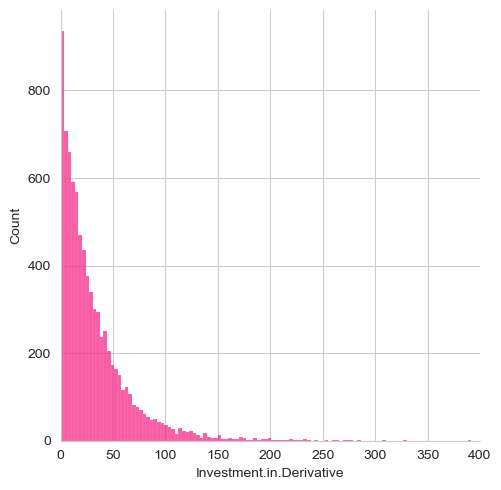

In [12]:
sns.displot(x='Investment.in.Derivative',data=bd)
plt.xlim(left=0,right=400)
plt.show()

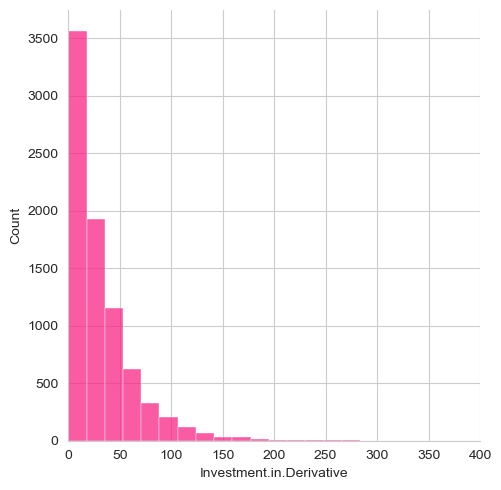

In [13]:
# you can control number of bins and thus make the bin ranges finer or coarser
# option kind='hist' generates histograms with function displot

sns.displot(x='Investment.in.Derivative',data=bd,kind='hist',bins=100)
plt.xlim(left=0,right=400)
plt.show()

# note that as you change number of bins, y-axis which is showing count will change limits
# understandably if the bin width is higher , the count will be higher too

Sometimes you might want to see this as rather a density curve. At this level you can imagine density curve to be a line joining top of the bins of the histogram. Its a very simplified way to look at density curve but for now this will sufice. By default on the y-axis you will have proportion of the data instead of raw frequency. You can get density curve by setting `kind='kde'` . option `bins` isnt required with this. 

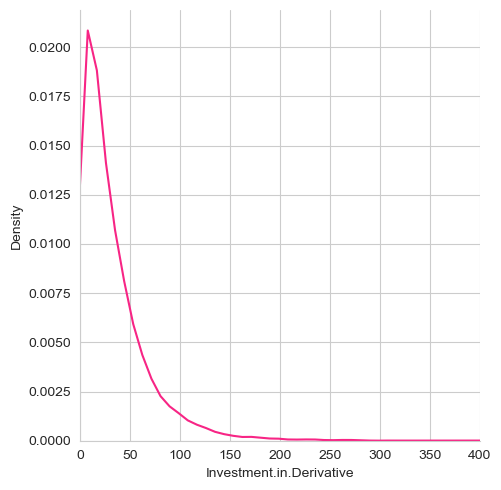

In [14]:
sns.displot(x='Investment.in.Derivative',data=bd,kind='kde')
plt.xlim(left=0,right=400)
plt.show()

with the same function you can also get a cumulative frequency curve, where the cumulation [summation of proportions] happens in ascending manner over range of the data column. You can get that with option `kind='ecdf'`

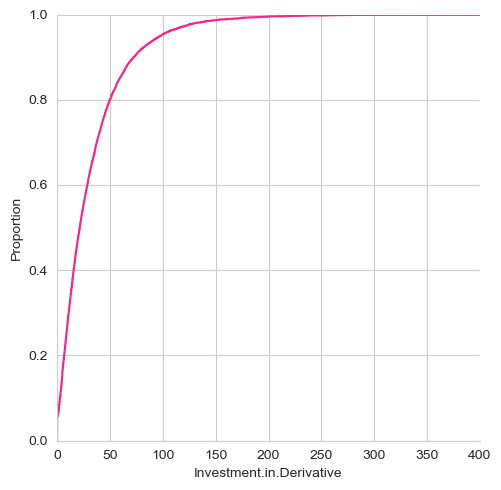

In [15]:
sns.displot(x='Investment.in.Derivative',data=bd,kind='ecdf')
plt.xlim(left=0,right=400)
plt.show()

Another popular visualisation for single numeric columns is `boxplot` . Boxplot has three components 

* box in the middle : has three lines along the length for Q1, Q2 [median] and Q3 
* whiskers : They extend to on higher side to either Q3 + 1.5*IQR , or the max value in the data whichever is smaller. Similarly on the lower side they extend to Q3 - 1.5*IQR , or the minimum value in the data whichever comes first . This in a way tries to show default majority population range , any values which exceeds these limits is shown separately and can be considered extreme in comparison to rest of the population 
* extreme values : if any value exceeds these limits [Q1-1.5*IQR , Q3+1.5*IQR] it is displayed individiually 

Note that an extreme value or an outlier is not necessarily useless. It is an important piece of information especially for long tailed processes where these values occur naturally just not as often and hence get termed as extreme

In [16]:
ld=pd.read_csv(r'./loan_data_train.csv')

In [17]:
ld['Amount.Requested']=pd.to_numeric(ld['Amount.Requested'],errors='coerce')

<Axes: ylabel='Amount.Requested'>

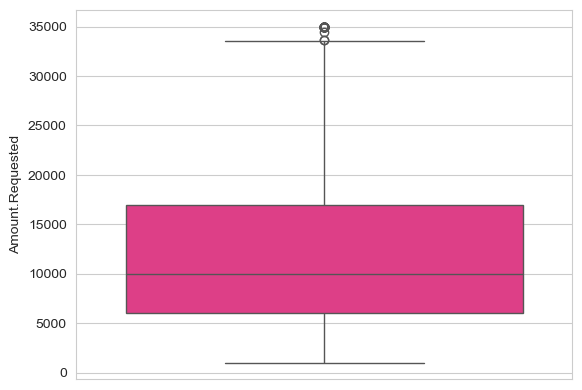

In [18]:
sns.boxplot(y='Amount.Requested',data=ld)

Note that boxplots for columns where the distribution of values is very skewed to one side will look peculiar with very thin box and long whisker and a large number of values will show as extreme.

There are some variations of boxplot which you can explore : `striplot` , `swarmplot` , `violin plot` etc 

Remember that visualisations are used to tell your story in an appealing manner. Your choices will not only be driven by what you prefer but also by what makes sense to your intended audience. While we are learning this, its ok to look at many possibilities. But in your work, use visualisation as a communication tool , dont make visualisations for the sake of it, consider how they fit in your data story . 

# Categorical Data

The default go to option here is the count plot that we saw earlier when learning about customisation of different aspect of your chart . Lets do that [without the customisation] for another data column .

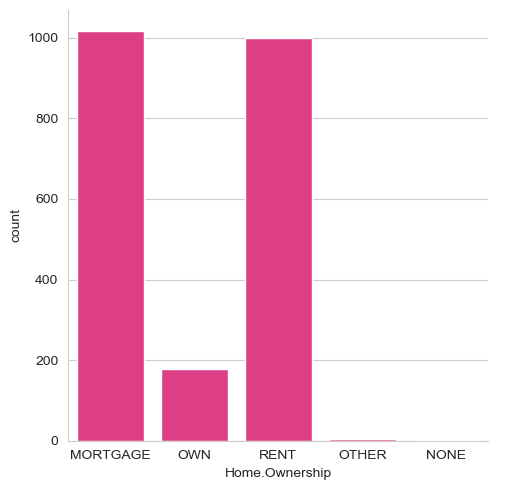

In [19]:
sns.catplot(x='Home.Ownership',data=ld,kind='count')

# experiment with customising this as we did earlier 

there is no direct function for pie charts in seaborn , however we can use `plt` for that 

In [20]:
ld['Employment.Length'].value_counts()

Employment.Length
10+ years    575
< 1 year     229
2 years      217
3 years      203
5 years      181
4 years      162
1 year       159
6 years      134
7 years      109
8 years       95
9 years       66
.              1
Name: count, dtype: int64

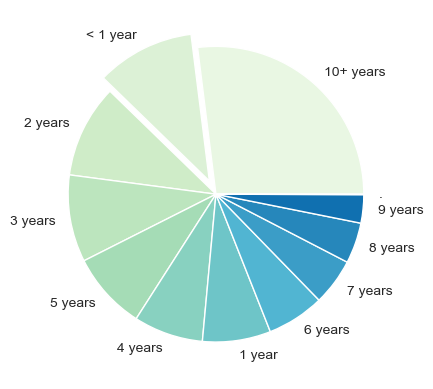

In [21]:
sns.set_palette(sns.color_palette('GnBu',12)) 

# by default each palette has 10 distinct colors , which you increase as per your data
k=ld['Employment.Length'].value_counts()
count=k.values
categories=k.index

# to move some of the categories pieces of pie to move out, its not mandatory though
explode=[0]*12 # there are 12 categories 
explode[1]=0.1 # we want to make 2nd position count to stand out

plt.pie(count,labels=categories,labeldistance=1.1,explode=explode)

plt.show()

# Combinations of Data

when you are looking at a combination of numeric numeric column, we make scatter plot or joint density plot where x and y axes represent two numeric feautures 

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Column names for the dataset
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

# Load the dataset
cars = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


you can use displot to create that however relplot is more versatile. lets look at displot first

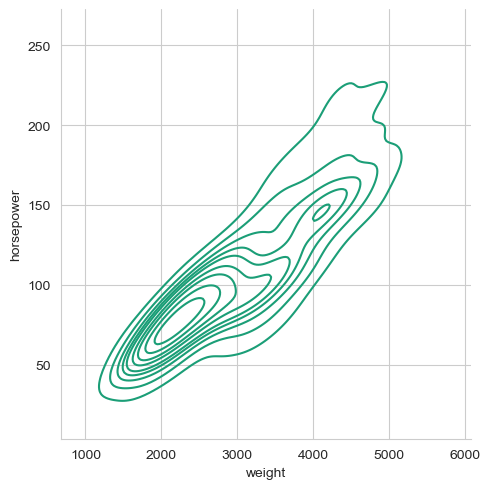

In [23]:
sns.set_palette(sns.color_palette('Dark2'))
sns.displot(x='weight',y='horsepower',data=cars,kind='kde')

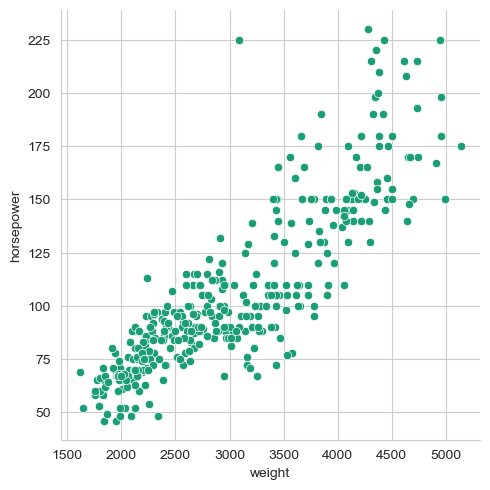

In [24]:
sns.relplot(x='weight',y='horsepower',data=cars,kind='scatter')

you can bring in other factors in this from the data using color, size etc. Lets see

In [25]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


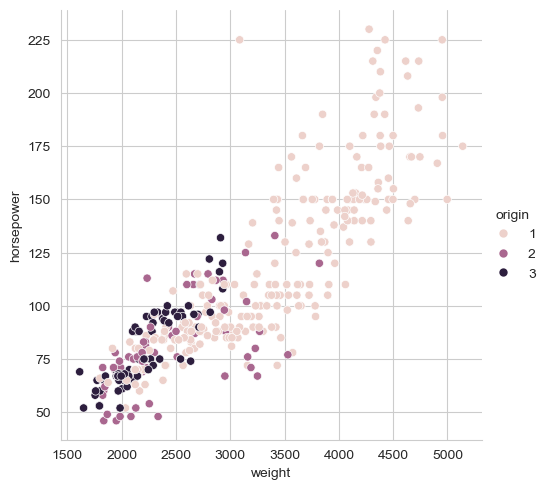

In [26]:
sns.relplot(x='weight',y='horsepower',data=cars,kind='scatter',hue='origin')

you create facets , row and columns of plot where data gets subsetted on categories of specified columns in row and col argument

In [27]:
ld.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000.0,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750.0,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100.0,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000.0,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [28]:
ld['fico']=ld['FICO.Range'].str.split('-',expand=True).astype(int).mean(axis=1)
ld['Interest.Rate']=pd.to_numeric(ld['Interest.Rate'].str.replace('%',''),errors='coerce')

In [29]:
ld_sub=ld[ld['Loan.Length'].isin(['60 months', '36 months']) & ld['Home.Ownership'].isin(['MORTGAGE','OWN','RENT'])]

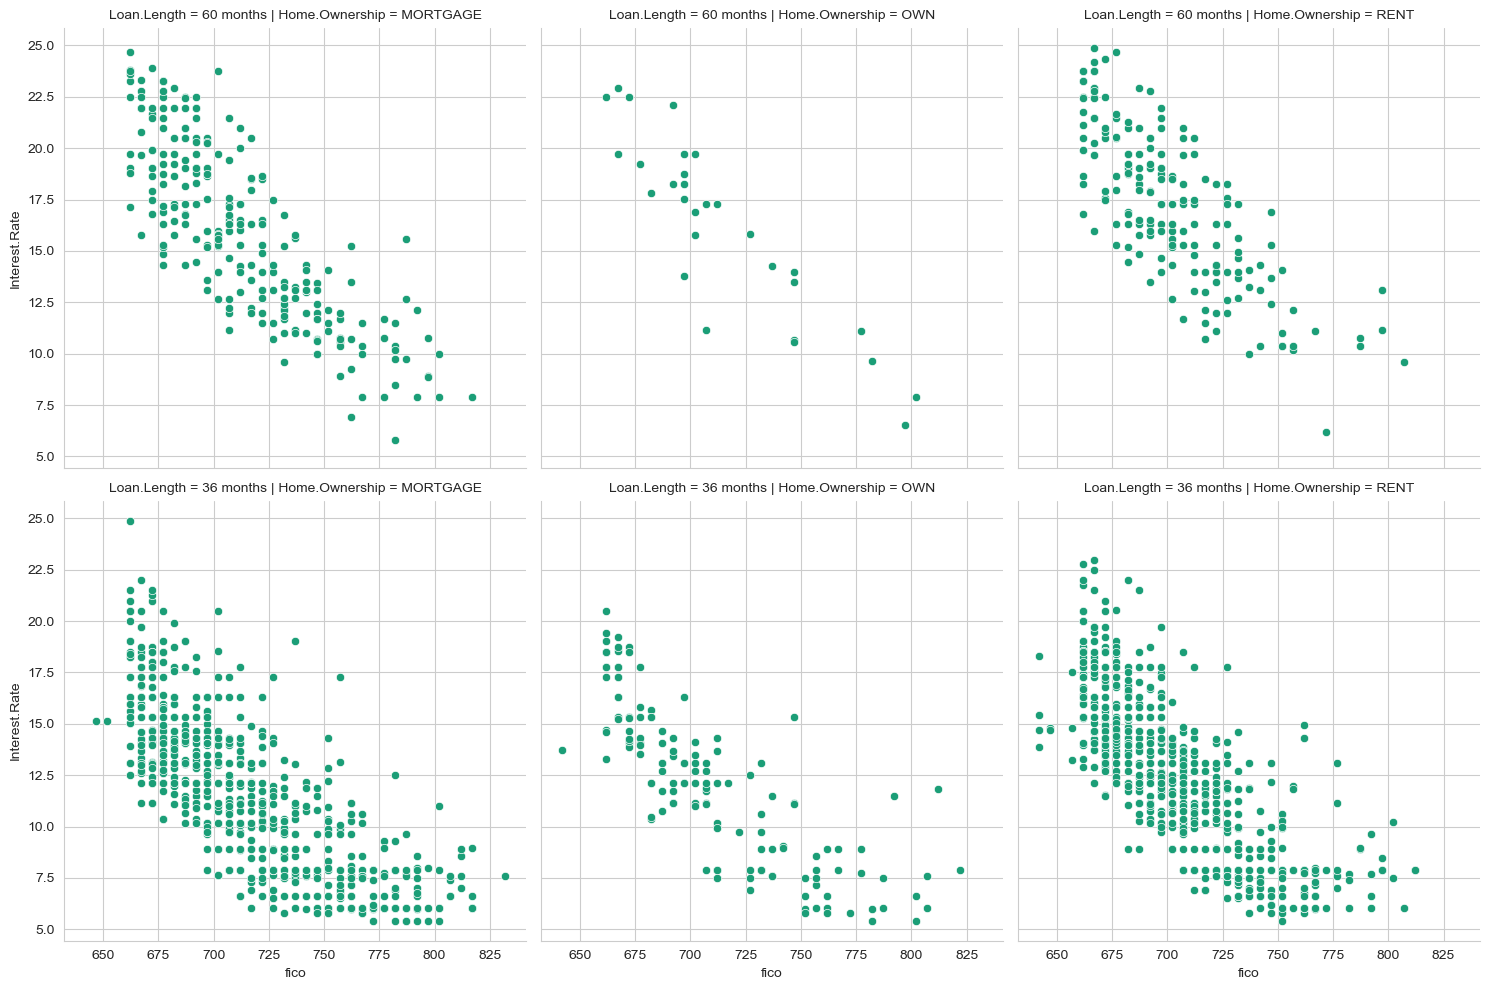

In [30]:
sns.relplot(x='fico',y='Interest.Rate',data=ld_sub,kind='scatter',row='Loan.Length',col='Home.Ownership')

if you want to visualise relationship , you can use `kind='line'`

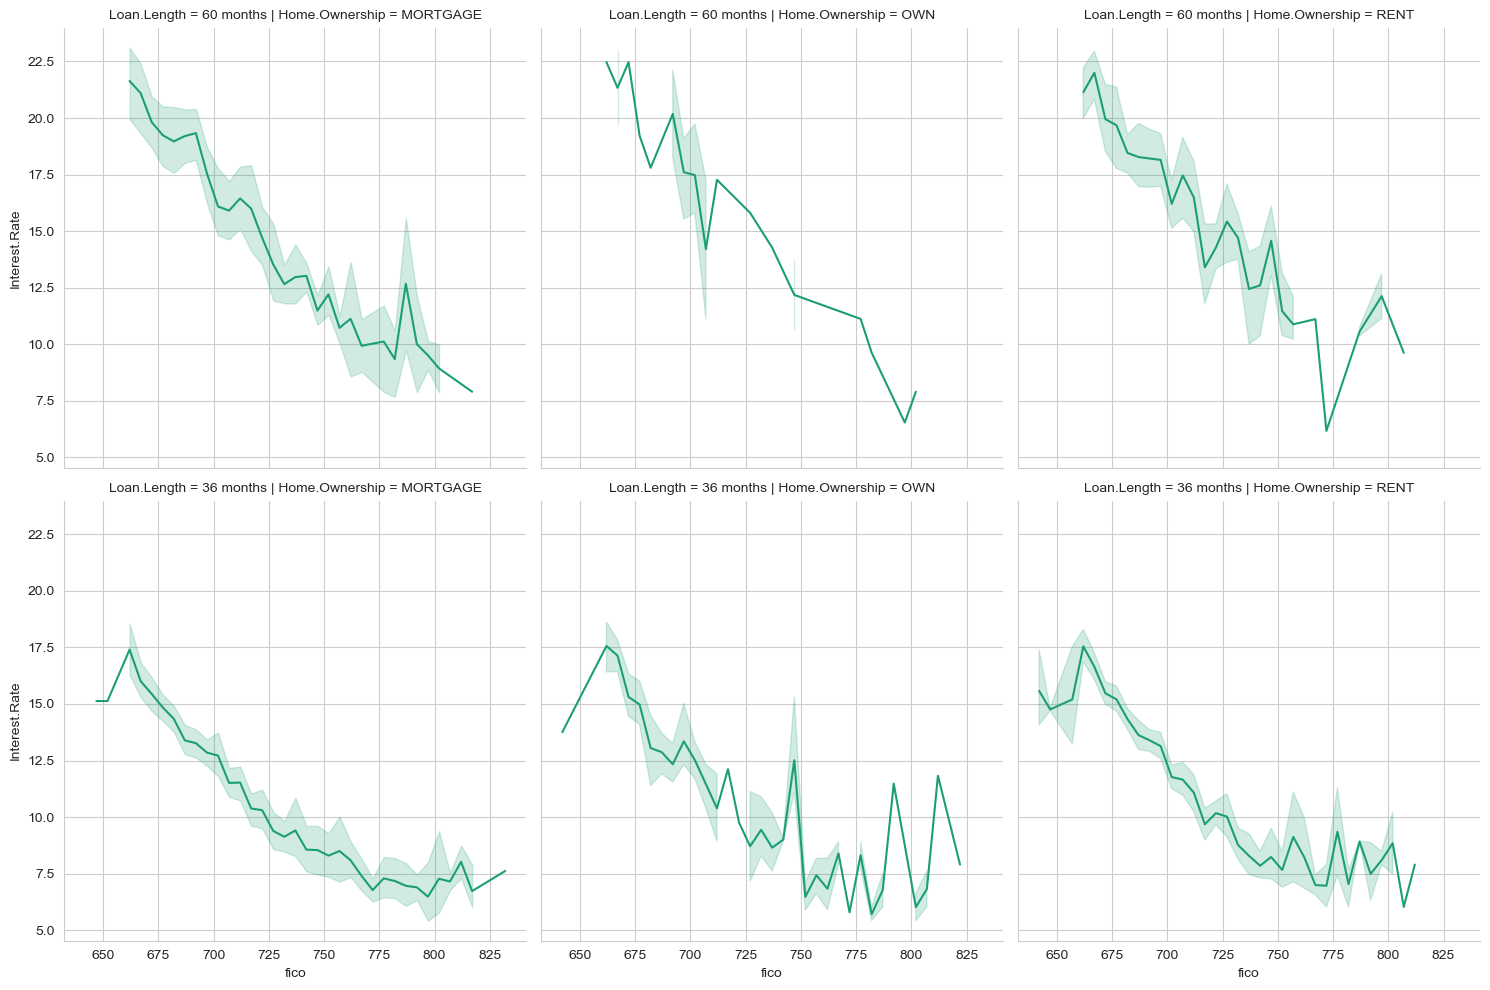

In [31]:
sns.relplot(x='fico',y='Interest.Rate',data=ld_sub,kind='line',row='Loan.Length',col='Home.Ownership')

You can visualise multiple columns with function `pairplot`

In [32]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [33]:
cars_sub=cars[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']]

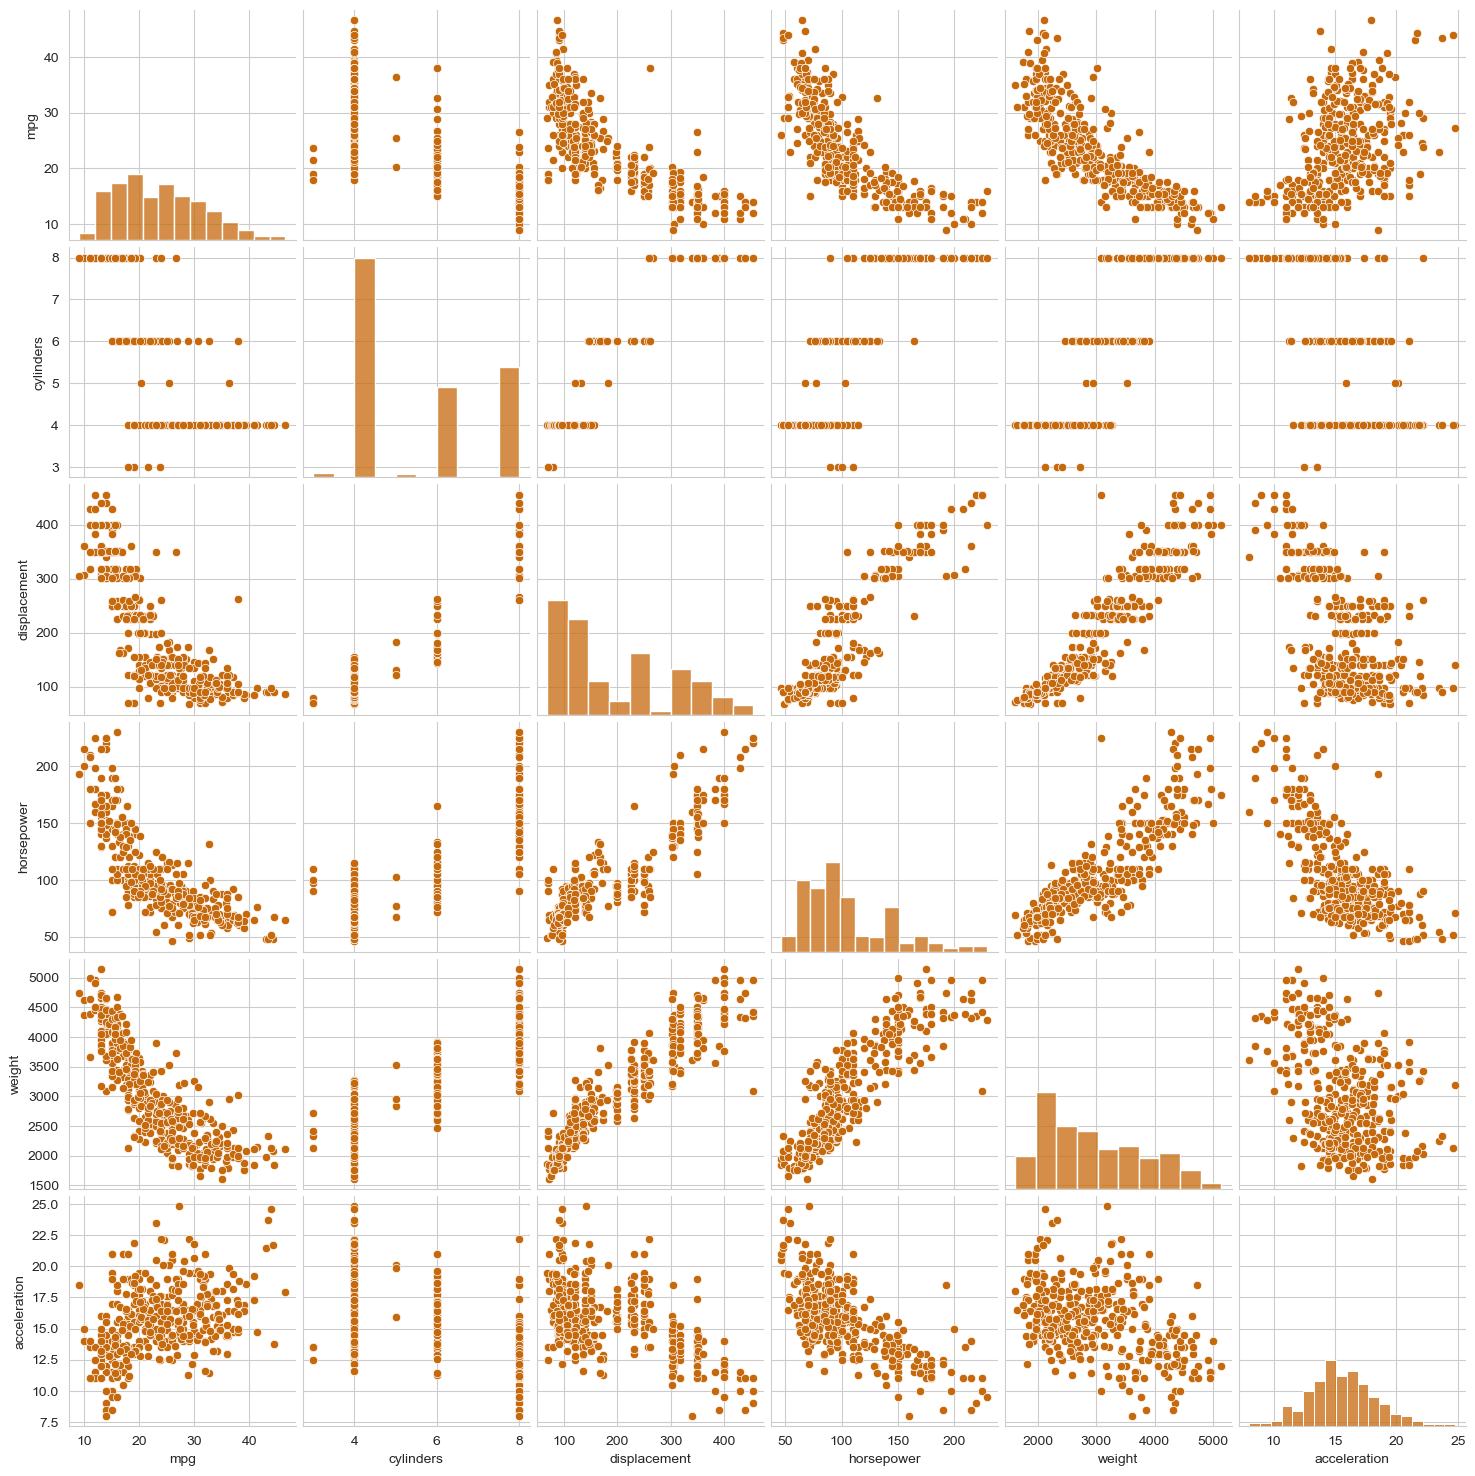

In [34]:
sns.set_palette('PuOr')

sns.pairplot(cars_sub)

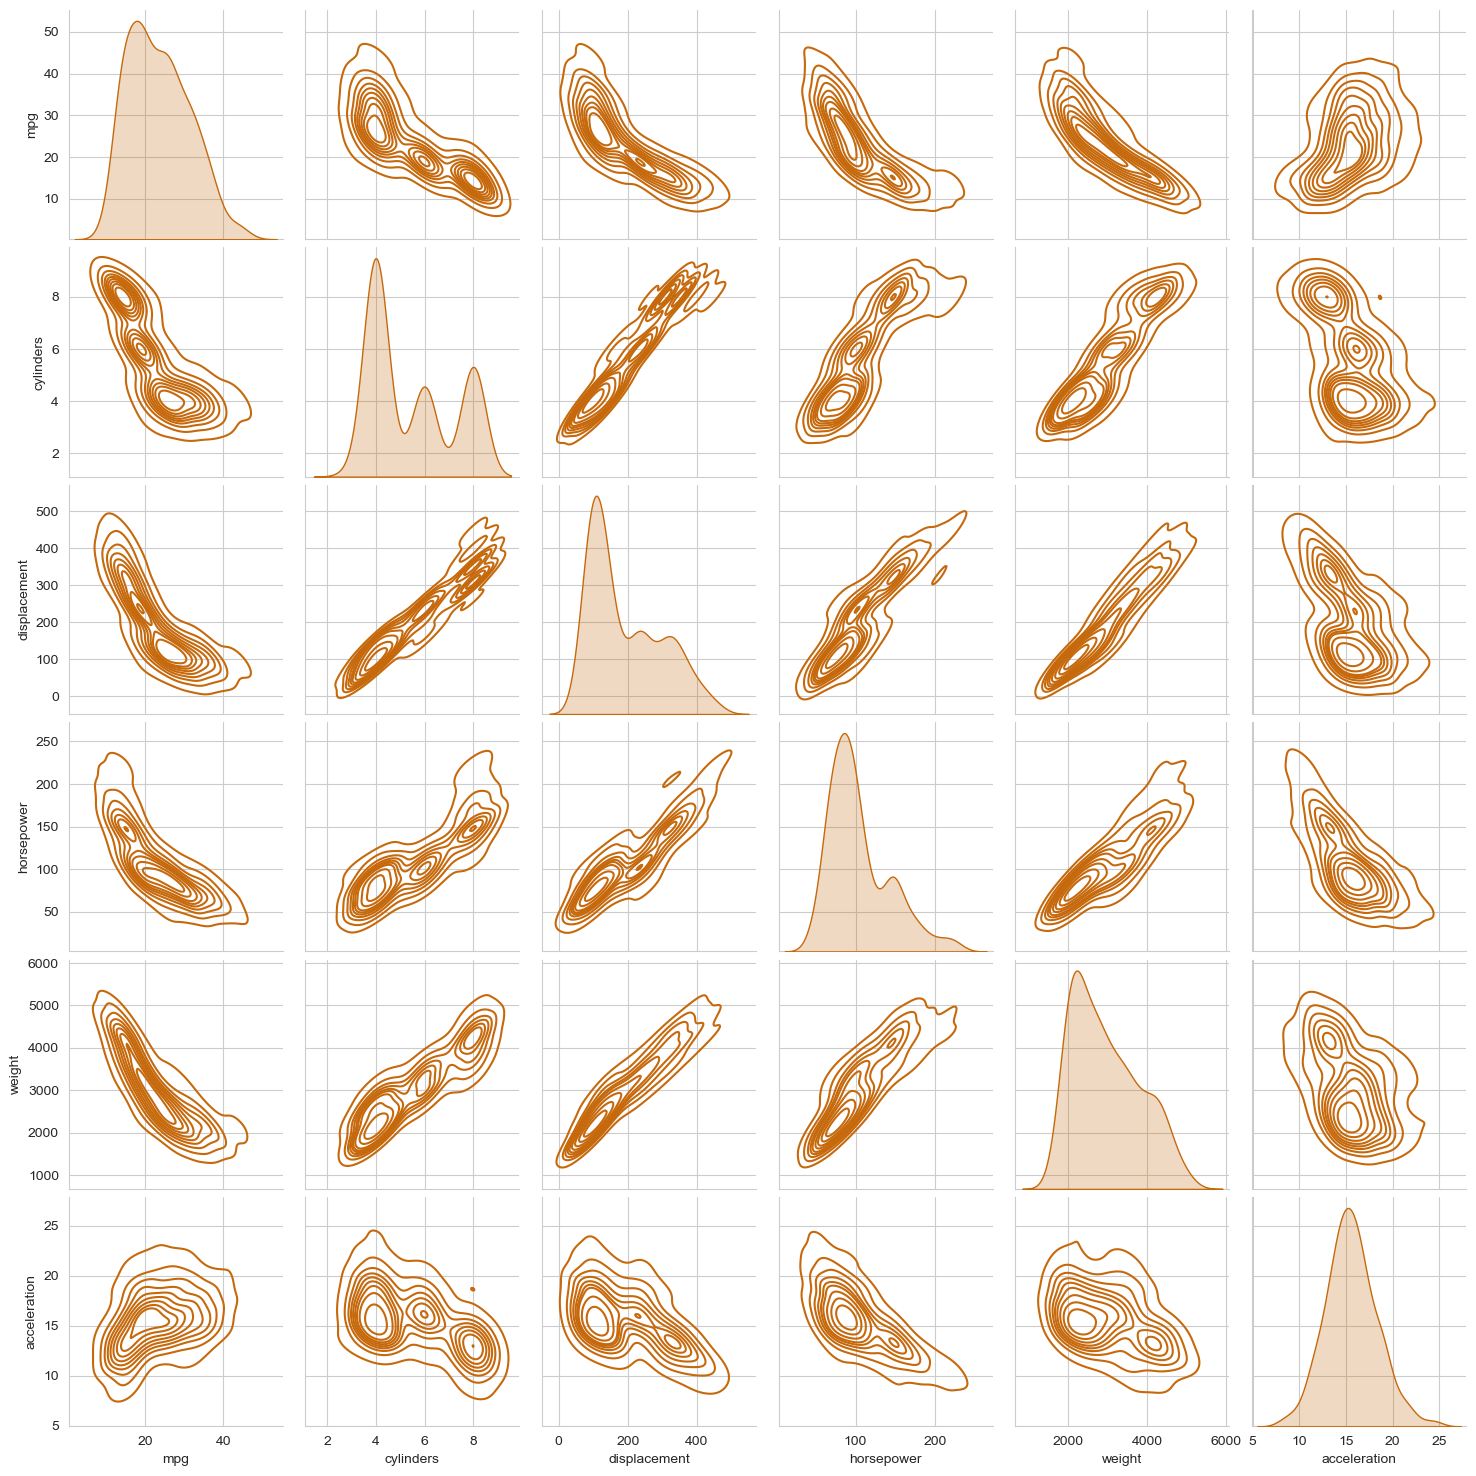

In [35]:
sns.pairplot(cars_sub,kind='kde')

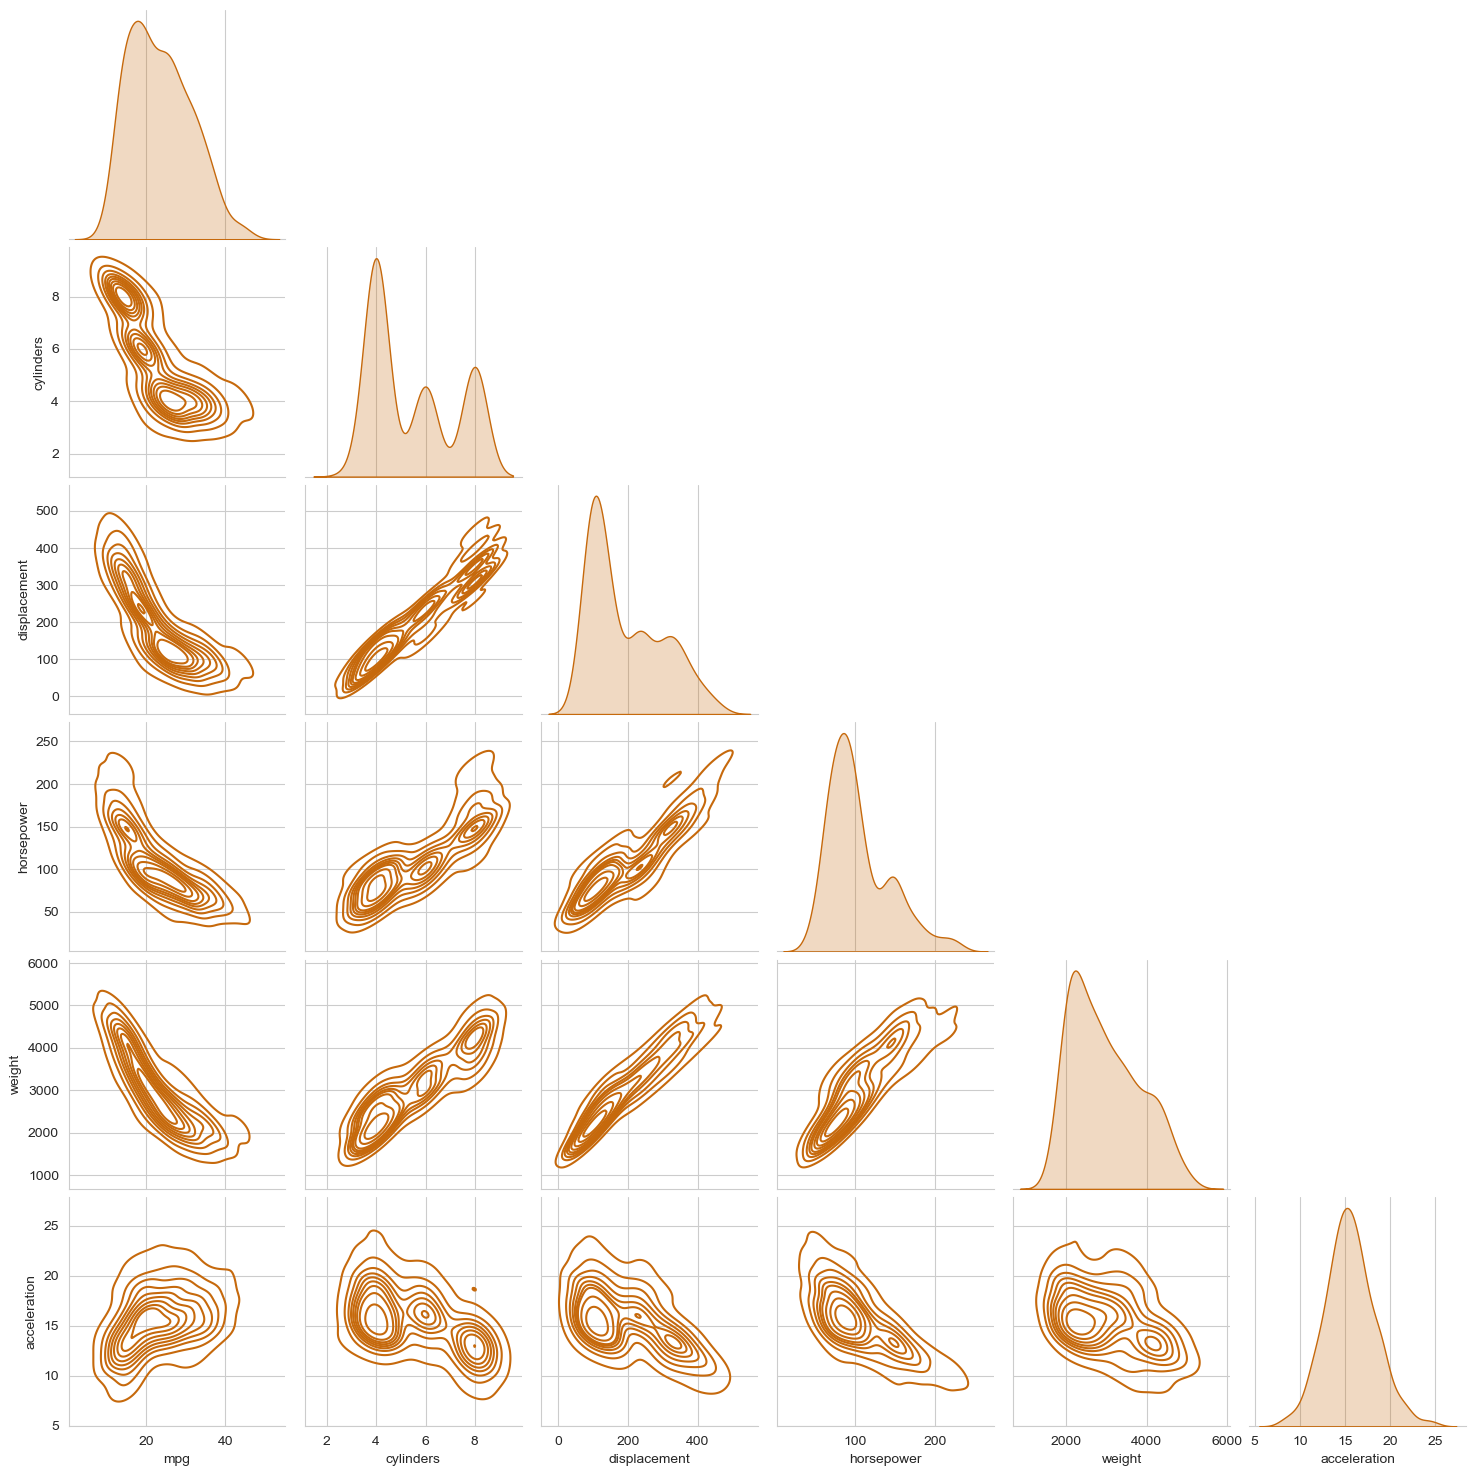

In [36]:
sns.pairplot(cars_sub,kind='kde',corner=True)

here also you can use argument `hue` to show additional categorical factor subsetting in the data

for visualising effect of a categorical column on single numeric column, we can  create single column numeric visualisations across the categories 

<Axes: xlabel='cylinders', ylabel='mpg'>

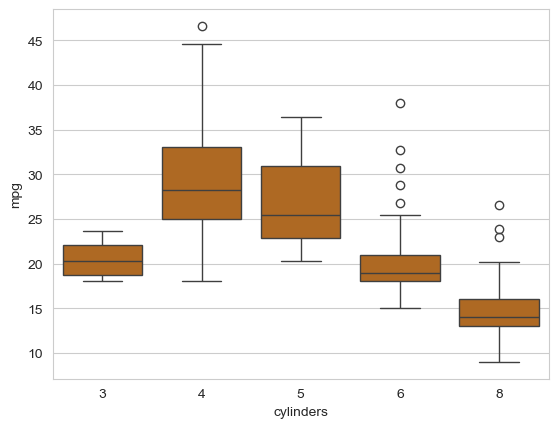

In [37]:
sns.boxplot(x='cylinders',y='mpg',data=cars)

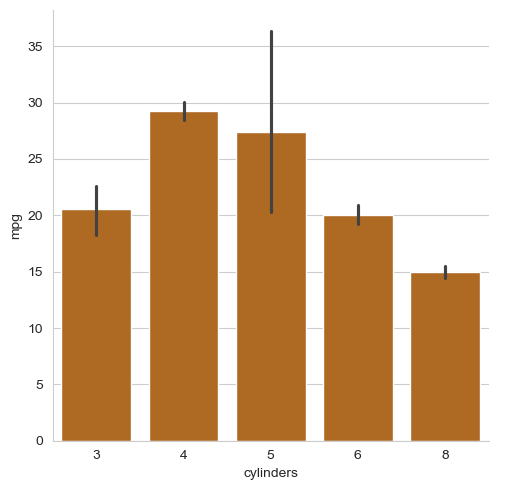

In [38]:
sns.catplot(x='cylinders',y='mpg',data=cars,kind='bar')

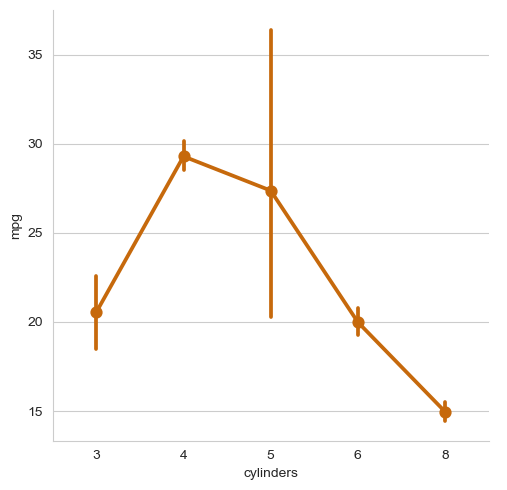

In [39]:
sns.catplot(x='cylinders',y='mpg',data=cars,kind='point')

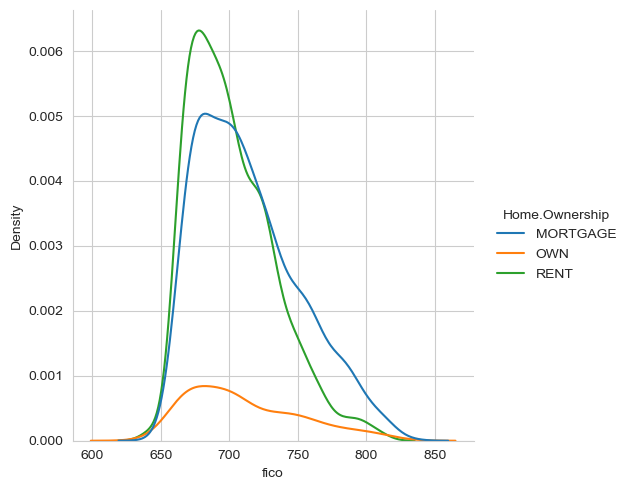

In [40]:
sns.set_palette('tab10')
sns.displot(hue='Home.Ownership',x='fico',data=ld_sub,kind='kde')

We will conclude for now , there are many context specific visualisation that we will come across later in the course , for example : time series data , text data. 

those who are interested in geospatial data, this seems like a good place to start : https://sustainability-gis.readthedocs.io/en/latest/lessons/L1/intro-to-python-geostack.html